In [1]:
import numpy as np

In [2]:
import hgcdte_py as hgcdte

In [3]:
import matplotlib.pyplot as plt

In [4]:
xs = np.array([0.0, 10.0, 10.00001, 12.999999, 13.0, 23.0])
ys = np.array([1.0, 1.0,  0.00000, 0.00000, 1.0,  1.0])

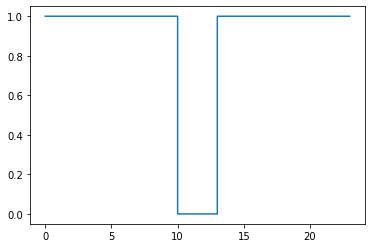

In [5]:
plt.plot(xs, ys)

In [6]:
mod = hgcdte.model(xs, ys)

In [7]:
hcr = hgcdte.hcore(mod, 3)

In [8]:
hin1, hin2 = hcr.hinst((0., 0.)), hcr.hinst((1., 0.))

In [9]:
import h5py

In [10]:
hi1 = hcr.spectre((0., 0.))

In [11]:
hi1.shape

(24,)

In [12]:
hi2 = hcr.spectre((1., 0.))

In [13]:
inp = h5py.File('h0.hdf5', 'r')

In [14]:
list(inp.keys())

['h0', 'h1']

In [15]:
hp1, hp2 = inp['h0'][:], inp['h1'][:]
inp.close()

In [16]:
to_norm = lambda arr: np.transpose(arr, (0, 2, 1, 3)).reshape(24, 24)
he1, he2 = to_norm(hp1), to_norm(hp2)

1.710343823457805e-06


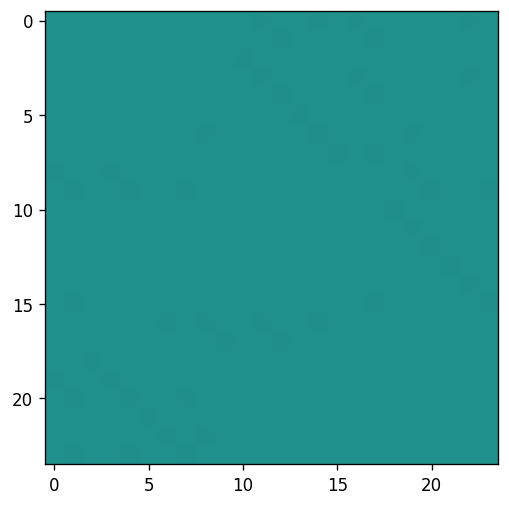

In [18]:
dif1 = hin1 - 1.e-3 * he1
print(np.max(np.abs(dif1)))
plt.figure(figsize=(5,5), dpi = 120)
plt.imshow(np.imag(dif1), vmin = -1.e-3, vmax = 1.e-3)

1.6142093939297553e-06


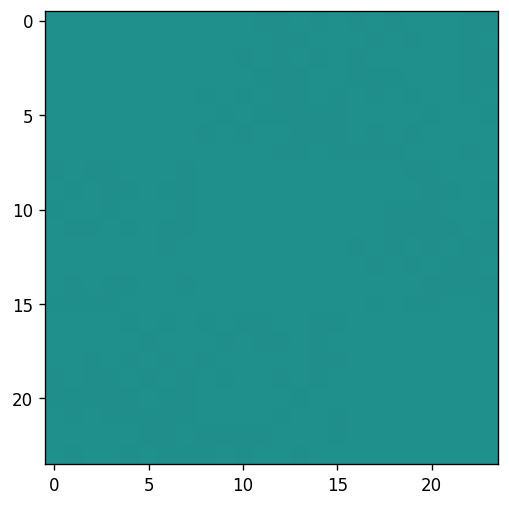

In [20]:
dif2 = hin2 - 1.e-3 * he2
print(np.max(np.abs(dif2)))
plt.figure(figsize=(5,5), dpi = 120)
plt.imshow(np.imag(dif2), vmin = -1.e-3, vmax = 1.e-3)

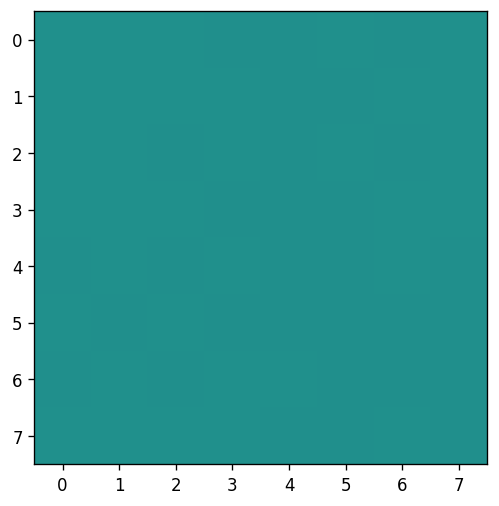

In [22]:
plt.figure(figsize=(5,5), dpi = 120)
plt.imshow(np.imag(dif2[0:8, 8:16]), vmin = -1.e-4, vmax = 1.e-4)

In [21]:
dif2[0:8, 8:16]

array([[-1.22224192e-06+5.68434189e-17j, -7.77156117e-19+0.00000000e+00j,
        -2.84217094e-17-2.84217094e-17j, -6.21724894e-18-3.55271368e-18j,
         1.77635684e-17+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         5.32907052e-18-3.55271368e-18j, -2.84217094e-17+0.00000000e+00j],
       [ 7.77156117e-19+0.00000000e+00j, -1.22224192e-06+5.68434189e-17j,
         0.00000000e+00+0.00000000e+00j, -1.77635684e-17+0.00000000e+00j,
        -6.21724894e-18-3.55271368e-18j,  2.84217094e-17+2.84217094e-17j,
        -2.84217094e-17+0.00000000e+00j, -5.32907052e-18+3.55271368e-18j],
       [-2.84217094e-17-2.84217094e-17j,  0.00000000e+00+0.00000000e+00j,
         5.32157342e-07-2.66453526e-17j, -2.27745069e-08+5.09795147e-10j,
        -3.56501757e-09-3.99363772e-09j,  0.00000000e+00+0.00000000e+00j,
         1.61040193e-08-3.60479605e-10j,  5.04187182e-09+5.64785662e-09j],
       [-6.21724894e-18-3.55271368e-18j, -1.77635684e-17+0.00000000e+00j,
        -4.16083030e-03-5.09795145e

In [34]:
hi1.transpose().shape

(24,)

In [9]:
ks2 = np.arange(0., 1.02, 0.02)

In [10]:
eiss2 = np.array([hcr.spectre((kx, 0.)) for kx in ks2])

In [11]:
plt.figure(figsize=(7.5,5), dpi=120)
plt.plot(ks2, eiss2[:, 366], 'y-')
plt.plot(ks2, eiss2[:, 368], 'r-')
plt.plot(ks2, eiss2[:, 370], 'g-')
plt.plot(ks2, eiss2[:, 372], 'b-')
plt.plot(ks2, eiss2[:, 374], 'k-')
plt.grid()

IndexError: index 366 is out of bounds for axis 1 with size 24

<Figure size 900x600 with 0 Axes>

In [ ]:
eiss2[0, 366:374:2] - eiss2[0, 370]

In [ ]:
eiss2[0:len(ks2):10, 366:376:2] - eiss2[0, 370]

In [ ]:
ks2[0:len(ks2):10]